# Multilayer Perceptron (MLP)

- "vanilla" feed-forward neural network

- consists of an input layer, multiple hidden layers and an output layer (deep neural network => deep learning)

- trained using the backpropagation algorithm

![MLP](img/mlp.png)

# Forward pass

- passing data through the network until output $\hat{\mathbf{y}}$ is calculated

- matrix multiplication of an input matrix $\mathbf{X}$ and weights of every hidden layer $\mathbf{W}_n$ plus a bias vector $\mathbf{b}_n$ passed to an activation function $f_n$ until the output layer is reached

- it is quite common for the output layer to have a different activation function as compared to the hidden layers

- forward pass for the image above:

$$
\begin{align*}

\begin{aligned}
\mathbf{Z}_1 &= \mathbf{X} \cdot \mathbf{W}_1 + \mathbf{b}_1 \\
\mathbf{U}_1 &= f_1(\mathbf{Z}_1) \\
&\text{Hidden layer 1}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_2 &= \mathbf{U}_1 \cdot \mathbf{W}_2 + \mathbf{b}_2 \\
\mathbf{U}_2 &= f_2(\mathbf{Z}_2) \\
&\text{Hidden layer 2}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_3 &= \mathbf{U}_2 \cdot \mathbf{W}_3 + \mathbf{b}_3 \\
\mathbf{U}_3 &= f_3(\mathbf{Z}_3) \\
&\text{Hidden layer 3}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_4 &= \mathbf{U}_3 \cdot \mathbf{W}_4 + \mathbf{b}_4 \\
\mathbf{U}_4 &= f_4(\mathbf{Z}_4) \\
&\text{Hidden layer 4}
\end{aligned} \quad \quad

\begin{aligned}
\mathbf{Z}_5 &= \mathbf{U}_4 \cdot \mathbf{W}_5 + \mathbf{b}_5 \\
\hat{\mathbf{y}} &= f_5(\mathbf{Z}_5) \\
&\text{Output layer}
\end{aligned}

\end{align*}
$$


# Backpropagation (backward pass)

- distributing gradients backwards through the network using the chain rule

- gradient calculation starts at the output layer using the loss function $L(\hat{y}, y)$

- calculated gradients of network parameters (weights $\mathbf{W}$ and biases $\mathbf{b}$) are used to minimize the loss function using gradient descent

- backward pass for the image above ($\cdot$ denotes dot product, $\odot$ denotes element-wise multiplication (Hadamard product)):

$$
\begin{align*}

\begin{aligned}
\frac{\partial L}{\partial \mathbf{Z}_5} &= \frac{\partial L}{\partial \hat{\mathbf{y}}} \cdot \frac{\partial \hat{\mathbf{y}}}{\partial \mathbf{Z}_5} \\
&= \frac{\partial L}{\partial \hat{\mathbf{y}}} \odot f_5'(\mathbf{Z}_5) \\
&= \delta_{5}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial L}{\partial \mathbf{W}_5} &=  \frac{\partial L}{\partial \mathbf{Z}_5} \cdot \frac{\partial \mathbf{Z}_5}{\partial \mathbf{W}_5} \\
&= \mathbf{U}_{4}^{\intercal} \cdot \frac{\partial L}{\partial \mathbf{Z}_5} \\
&= \mathbf{U}_{4}^{\intercal} \cdot \delta_{5}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial L}{\partial \mathbf{b}_5} &=  \frac{\partial L}{\partial \mathbf{Z}_5} \cdot \frac{\partial \mathbf{Z}_5}{\partial \mathbf{b}_5} \\
&= \delta_{5} \cdot 1 \\
&= \sum \delta_{5}
\end{aligned}

\end{align*}
$$

$$
\begin{align*}

\begin{aligned}
\frac{\partial L}{\partial \mathbf{U}_4} &= \frac{\partial L}{\partial \mathbf{Z}_5} \cdot \frac{\partial \mathbf{Z}_5}{\partial \mathbf{U}_4} \\
&= \frac{\partial L}{\partial \mathbf{Z}_5} \cdot \mathbf{W}_{5}^{\intercal} \\
&= \delta_{5} \cdot \mathbf{W}_{5}^{\intercal}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial L}{\partial \mathbf{Z}_4} &= \frac{\partial L}{\partial \mathbf{U}_4} \cdot \frac{\partial \mathbf{U}_4}{\partial \mathbf{Z}_4} \\
&= \left( \delta_{5} \cdot \mathbf{W}_{5}^{\intercal} \right) \odot f_4'(Z_4)\\
&= \delta_{4}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial L}{\partial \mathbf{W}_4} &=  \frac{\partial L}{\partial \mathbf{Z}_4} \cdot \frac{\partial \mathbf{Z}_4}{\partial \mathbf{W}_4} \\
&= \mathbf{U}_{3}^{\intercal} \cdot \frac{\partial L}{\partial \mathbf{Z}_4} \\
&= \mathbf{U}_{3}^{\intercal} \cdot \delta_{4}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial L}{\partial \mathbf{b}_4} &=  \frac{\partial L}{\partial \mathbf{Z}_4} \cdot \frac{\partial \mathbf{Z}_4}{\partial \mathbf{b}_4} \\
&= \delta_{4} \cdot 1 \\
&= \sum \delta_{4}
\end{aligned}

\end{align*}
$$

$$\vdots$$
$$\vdots$$

$$
\begin{align*}

\begin{aligned}
\frac{\partial L}{\partial \mathbf{U}_1} &= \frac{\partial L}{\partial \mathbf{Z}_2} \cdot \frac{\partial \mathbf{Z}_2}{\partial \mathbf{U}_1} \\
&= \frac{\partial L}{\partial \mathbf{Z}_2} \cdot \mathbf{W}_{2}^{\intercal} \\
&= \delta_{2} \cdot \mathbf{W}_{2}^{\intercal}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial L}{\partial \mathbf{Z}_1} &= \frac{\partial L}{\partial \mathbf{U}_1} \cdot \frac{\partial \mathbf{U}_1}{\partial \mathbf{Z}_1} \\
&= \left( \delta_{2} \cdot \mathbf{W}_{2}^{\intercal} \right) \odot f_1'(Z_1)\\
&= \delta_{1}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial L}{\partial \mathbf{W}_1} &=  \frac{\partial L}{\partial \mathbf{Z}_1} \cdot \frac{\partial \mathbf{Z}_1}{\partial \mathbf{W}_1} \\
&= \mathbf{X}^{\intercal} \cdot \frac{\partial L}{\partial \mathbf{Z}_1} \\
&= \mathbf{X}^{\intercal} \cdot \delta_{1}
\end{aligned} \quad \quad

\begin{aligned}
\frac{\partial L}{\partial \mathbf{b}_1} &=  \frac{\partial L}{\partial \mathbf{Z}_1} \cdot \frac{\partial \mathbf{Z}_1}{\partial \mathbf{b}_1} \\
&= \delta_{1} \cdot 1 \\
&= \sum \delta_{1}
\end{aligned}

\end{align*}
$$

# Implementation

In [19]:
import numpy as np
import matplotlib.pyplot as plt

class Layer:
    
    def __init__(self, n_inputs: int, n_neurons: int) -> None:
        """
        Layer of neurons consisting of a weight matrix and bias vector.

        Parameters
        ----------
        n_inputs : int
            Number of inputs that connect to the layer.

        n_neurons : int
            Number of neurons the layer consists of.

        Attributes
        ----------
        weights : numpy.ndarray
            Matrix of weight coefficients.

        biases : numpy.ndaray
            Vector of bias coefficients.
        """

        # Weights are randomly initialized, small random numbers seem to work well
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        # Bias vector is initialized to a zero vector
        self.biases = np.zeros(n_neurons)

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using the layer. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        # Store inputs for later use (backpropagation)
        self.inputs = inputs
        # Output is the dot product of the input matrix and weights plus biases
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using the layer. Creates gradient attributes for weights, biases and inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        self.dweights = np.dot(self.inputs.T, delta)
        self.dbiases = np.sum(delta, axis=0)
        self.dinputs = np.dot(delta, self.weights.T)

class ReLU:

    def __init__(self) -> None:
        """
        Rectified Linear Unit activation function.
        """
        pass

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using ReLU. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        # Store inputs for later use (backpropagation)
        self.inputs = inputs
        # Output is max value between 0 and inputs
        self.output = np.maximum(0, inputs)

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using ReLU. Creates gradient attribute for inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        self.dinputs = delta.copy()
        # Derivative of ReLU
        self.dinputs[self.inputs < 0] = 0

class Sigmoid:

    def __init__(self) -> None:
        """
        Sigmoid activation function.
        """
        pass

    def forward(self, inputs: np.ndarray) -> None:
        """
        Forward pass using Sigmoid. Creates output attribute.

        Parameters
        ----------
        inputs : numpy.ndarray
            Input matrix.

        Returns
        -------
        None
        """
        self.output = 1 / (1 + np.exp(-inputs))

    def backward(self, delta: np.ndarray) -> None:
        """
        Backward pass using Sigmoid. Creates gradient attribute for inputs.

        Parameters
        ----------
        delta : np.ndarray
            Accumulated gradient obtained by backpropagation.

        Returns
        -------
        None
        """
        # Derivative of Sigmoid
        self.dinputs = delta * (1 - self.output) * self.output

class BCE_Loss:

    def calculate(self, y_pred, y_true):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        loss = -(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))
        return np.mean(loss)
    
    def backward(self, y_pred, y_true):
        self.dinputs = (y_pred - y_true) / (y_pred * (1 - y_pred))

class Optimizer_SGD:

    def __init__(self, learning_rate = 1e-3, momentum = 0, decay = 0) -> None:
        """
        Stochastic gradient descent optimizing algorithm.

        Parameters
        ----------
        learning_rate : float, default=0.001
            Step size used in gradient descent.

        momentum : float, default=0
            Factor used to scale past gradients.

        decay : float, default=0
            Factor used to reduce learning rate over time.

        Attributes
        ----------
        iterations : int, default=0
            Number of training iterations used to calculate new learning rate with decay.
        """
        self.learning_rate = learning_rate
        self._current_learning_rate = learning_rate
        self.momentum = momentum
        self.decay = decay
        self._iterations = 0


    def update_parameters(self):
        """
        Method for updating current learning rate if decay is available.
        """
        if self.decay:
            # Inverse decay method
            self._current_learning_rate = self.learning_rate  / (1 + self._iterations * self.decay)

    def update_layer_parameters(self, layer: Layer) -> None:
        """
        Method for updating layer parameters.

        Parameters
        ----------
        layer : Layer
            Layer that is being updated.
        """

        # If momentum is given
        if self.momentum:

            # If the layer doesn't have momentum attribute initialize it
            if not hasattr(layer, 'weight_momentum'):
                layer.weight_momentum = np.zeros_like(layer.weights)
                layer.bias_momentum = np.zeros_like(layer.biases)

            layer.weight_momentum = self.momentum * layer.weight_momentum - self._current_learning_rate * layer.dweights
            layer.bias_momentum = self.momentum * layer.bias_momentum - self._current_learning_rate * layer.dbiasess

            weight_updates = layer.weight_momentum
            bias_updates = layer.bias_momentum

        else:

            weight_updates = -self._current_learning_rate * layer.dweights
            bias_updates = -self._current_learning_rate * layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates

class MultilayerPerceptron:

    def __init__(self, layers, loss_function, optimizer):
        self.layers = layers
        self.loss_function = loss_function
        self.optimizer = optimizer

    def forward(self, X):

        self.layers[0].forward(X)

        for idx, layer in enumerate(self.layers[1:], start=1):
            layer.forward(self.layers[idx - 1].output)

        self.output = self.layers[-1].output

    def backward(self, y):

        self.loss_function.backward(self.output, y)
        self.layers[-1].backward(self.loss_function.dinputs)

        for idx, layer in enumerate(self.layers[::-1][1:]):
            layer.backward(self.layers[idx - 1].dinputs)

    def update_parameters(self):

        for layer in self.layers:
            if hasattr(layer, 'weights'):
                self.optimizer.update_layer_parameters(layer)

        self.optimizer.update_parameters()

    def train(self, X, y, iterations=1000):

        for i in range(iterations):

            self.forward(X)

            if not i % 500:
                print(f'Loss: {self.loss_function.calculate(self.output, y)}')

            self.backward(y)

            self.update_parameters()

    def predict(self, X):
        self.forward(X)
        return self.output
    

In [20]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

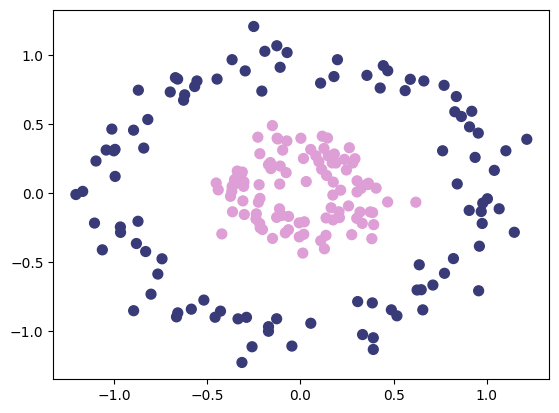

In [21]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=200, factor=0.3, noise=0.1)
plot_2d_clf_problem(X, y)

In [22]:
layers = [Layer(2, 16), ReLU(), Layer(16, 16), ReLU(), Layer(16, 1), Sigmoid()]
model = MultilayerPerceptron(layers=layers, loss_function=BCE_Loss(), optimizer=Optimizer_SGD(learning_rate=5e-3, momentum=0.3, decay=1e-2))

model.train(X, y.reshape(1, -1))
plot_2d_clf_problem(X, y, lambda x: model.predict(x) > 0.5)

Loss: 0.693152843609661


ValueError: shapes (200,200) and (1,16) not aligned: 200 (dim 1) != 1 (dim 0)